<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Find-correlation-between-params" data-toc-modified-id="Find-correlation-between-params-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Find correlation between params</a></span></li></ul></div>

In [5]:
%cd ..
%load_ext autoreload
%autoreload 2


C:\Users\julia\Documents\Imperial
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%cd DA_project

C:\Users\julia\Documents\Imperial\DA_project


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import VarDACAE
sns.set()

In [10]:
data_dir = os.getcwd() + "/experiments/batch_DA/3/"
df_AE = pd.read_csv(data_dir + "AE.csv")
df_SVD = pd.read_csv(data_dir + "SVD.csv")
df_AE.tail()

,Unnamed: 0,counts,da_MAE_mean,l1_loss,l2_loss,percent_improvement,ref_MAE_mean,time
0,0,246658,0.450510,5609.8013,511.93845,95.865931,10.897497,2.054353
1,1,246675,0.402800,7117.9937,894.55740,96.670671,12.098527,0.177939
2,2,166071,0.940170,6042.6753,711.22534,63.894876,2.603980,0.115898
3,3,161186,1.073888,6691.1807,643.67114,57.875028,2.549291,0.157977
4,4,246653,0.443491,6983.3086,879.60780,96.209064,11.698732,0.147874


In [12]:
df_SVD["percent_improvement"].mean()
df_SVD["percent_improvement"].std()

16.670155846934446

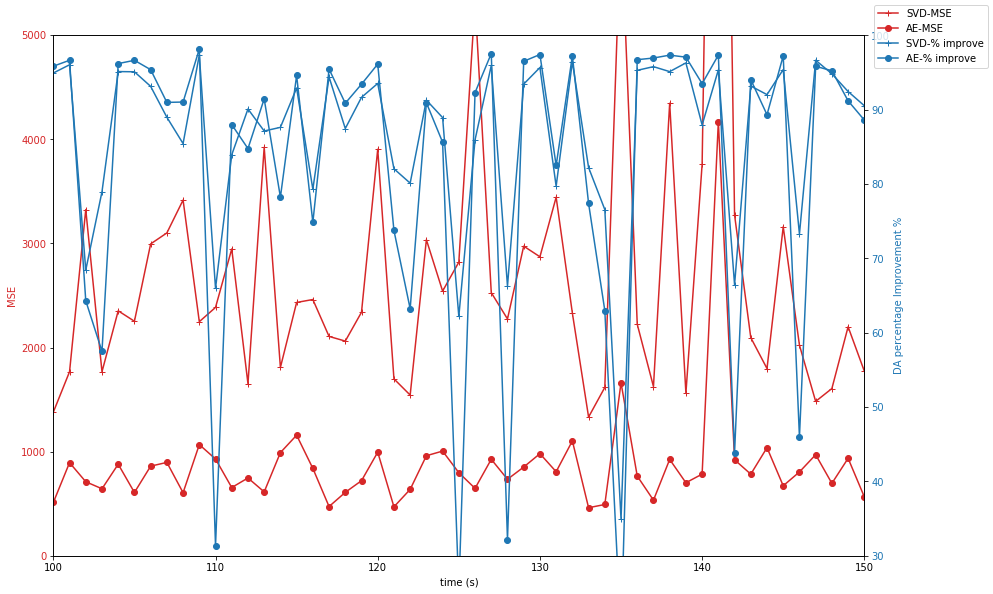

In [15]:
#Plot L2 on left axis and percent improvement on y axis against time
# Create some mock data
t = df_SVD.index


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('MSE', color=color)


# multiple line plot
ax1.plot( t, 'l2_loss', data=df_SVD, marker='+',   color=color, )
ax1.plot(t, 'l2_loss', data=df_AE, marker='o',  color=color)
ax1.set_ylim(0, 5000)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(100, 150)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('DA percentage Improvement %', color=color)  # we already handled the x-label with ax1

ax2.plot( t, 'percent_improvement', data=df_SVD, marker='+', color=color, )
ax2.plot(t, 'percent_improvement', data=df_AE, marker='o', color=color)
ax2.set_ylim(30, 100)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(["SVD-MSE", "AE-MSE"] + ["SVD-% improve", "AE-% improve"])
fig.set_size_inches(15, 9)
plt.show()
fig.savefig("all_values.png")

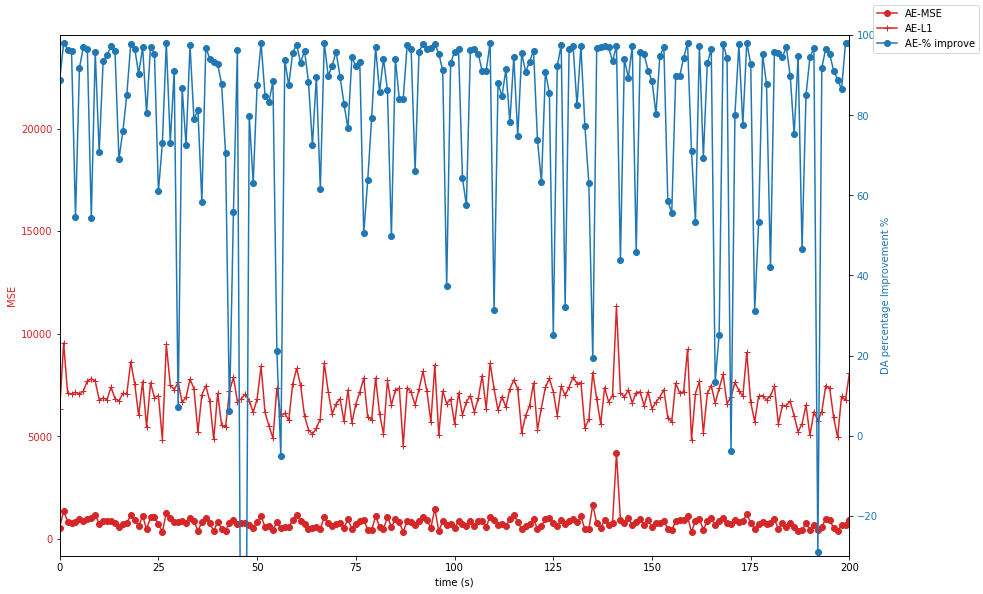

In [17]:
#Now look at values for all AE
#data_dir = os.getcwd() + "/experiments/batch_DA/2/"
df_AE = pd.read_csv(data_dir + "AE.csv")
df_AE.head()

#and plot
#Plot L2 on left axis and percent improvement on y axis against time
# Create some mock data
t = df_AE.index

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('MSE', color=color)


# multiple line plot
#ax1.plot( t, 'l2_loss', data=df_SVD, marker='+',   color=color, )
ax1.plot(t, 'l2_loss', data=df_AE, marker='o',  color=color)
ax1.plot(t, 'l1_loss', data=df_AE, marker='+',  color=color)


ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('DA percentage Improvement %', color=color)  # we already handled the x-label with ax1

#ax2.plot( t, 'percent_improvement', data=df_SVD, marker='+', color=color, )
ax2.plot(t, 'percent_improvement', data=df_AE, marker='o', color=color)
ax2.set_ylim((-30, 100))
ax2.tick_params(axis='y', labelcolor=color)


ax2.set_xlim((0, 200))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(["AE-MSE", "AE-L1"] + ["AE-% improve"])
fig.set_size_inches(15, 9)
plt.show()


## Find correlation between params

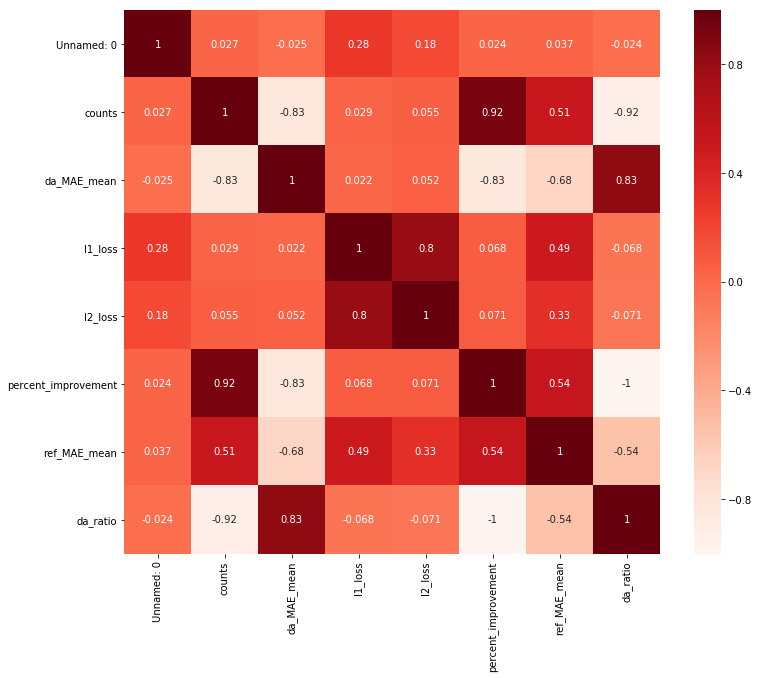

In [18]:
#copied from here: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#ADD column to df

df_AE["da_ratio"] = df_AE["da_MAE_mean"] / df_AE["ref_MAE_mean"] 

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_AE.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("correlation_AE_data.png")
plt.show()
#plt.savefig("correlation_AE_data.png")

NOTE: there is NO correlation between percentage improvement and the reconstruction error. In fact the correlation coefficients are positive for this case (0.068 and 0.071) for L1 and L2 losses respectively when we would expect them to be negative (i.e. better reconstruction gives lower losses and higher percentage improvement).

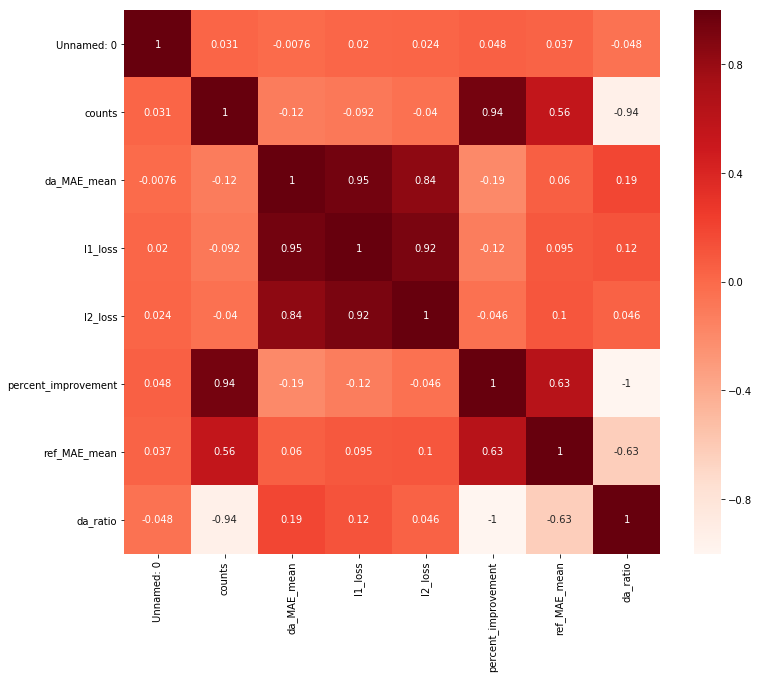

In [21]:
#Plot for SVD
df_SVD["da_ratio"] = df_SVD["da_MAE_mean"] / df_SVD["ref_MAE_mean"] 
plt.figure(figsize=(12,10))
cor = df_SVD.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("correlation_SVD_data.png")
plt.show()
